# Playground for Preprocessing Slides

- Stephen W. Thomas
- Used for MMAI 891 and MMA 865

In [1]:
import datetime
print(datetime.datetime.now())

2018-12-12 14:32:53.428780


In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Case Normalization

In [3]:
"Hi, my name is Steve.".lower()
'I work at the U.N. in NYC in the USA.'.lower()

'hi, my name is steve.'

'i work at the u.n. in nyc in the usa.'

# Tokenization

For simple tokenzation, the NLTK docs recommend to just use `.split()`

In [4]:
"Hi, my name is Steve.".split()
"Let's go to the U.N. in NYC!!".split()
"The ever-popular San Fransisco love letter arrived on March 11, 2019.".split()
"stephen.thomas@queensu.ca".split()
"(613) 453-6162".split()

['Hi,', 'my', 'name', 'is', 'Steve.']

["Let's", 'go', 'to', 'the', 'U.N.', 'in', 'NYC!!']

['The',
 'ever-popular',
 'San',
 'Fransisco',
 'love',
 'letter',
 'arrived',
 'on',
 'March',
 '11,',
 '2019.']

['stephen.thomas@queensu.ca']

['(613)', '453-6162']

Can also use `nltk`'s `word_tokenize()` function.

In [5]:
from nltk import word_tokenize
word_tokenize("Hi, my name is Steve.")
word_tokenize("Let's go to the U.N. in NYC!!")
word_tokenize("The ever-popular San Fransisco love letter arrived on March 11, 2019.")
word_tokenize("stephen.thomas@queensu.ca")
word_tokenize("(613) 453-6162")

['Hi', ',', 'my', 'name', 'is', 'Steve', '.']

['Let', "'s", 'go', 'to', 'the', 'U.N.', 'in', 'NYC', '!', '!']

['The',
 'ever-popular',
 'San',
 'Fransisco',
 'love',
 'letter',
 'arrived',
 'on',
 'March',
 '11',
 ',',
 '2019',
 '.']

['stephen.thomas', '@', 'queensu.ca']

['(', '613', ')', '453-6162']

`nltk` even has a tokenizer for tweets!

In [6]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

# N-Grams

In [7]:
from nltk.util import ngrams
tokens = nltk.word_tokenize("Hey there, I am awesome.")

grams = ngrams(tokens,2)
for grams in grams:
  print(grams)

grams = ngrams(tokens,3)
for grams in grams:
  print(grams)

('Hey', 'there')
('there', ',')
(',', 'I')
('I', 'am')
('am', 'awesome')
('awesome', '.')
('Hey', 'there', ',')
('there', ',', 'I')
(',', 'I', 'am')
('I', 'am', 'awesome')
('am', 'awesome', '.')


# Removing Characters

In [8]:
import re
s = "Hey! Let's go to the bar..."
re.sub(r'[^\w\s]', '', s)

'Hey Lets go to the bar'

In [9]:
import unidecode
s = u'Ábcdêãçoàúü'
unidecode.unidecode(s)

'Abcdeacoauu'

# Removing Numbers

In [10]:
import re
s = "There are only 4 classes left."
re.sub(r'\d+', '', s)

'There are only  classes left.'

# Regular Expressions

In [37]:
sentences = [
  "Alejandrina has a small store in her house where she sells basic products. Translated from Spanish by Jennifer Day, Kiva Volunteer.",
  "Nancy works as a saleswoman, her main product being used clothing.Translated from Spanish by Kiva Volunteer, Kristin Connor.",
  "Marjorie sells lunch to companies and construction workers. Translated by Ramn F. Kolb."]

[re.sub(r'Translated[^\.]+\.', '', s) for s in sentences]

['Alejandrina has a small store in her house where she sells basic products. ',
 'Nancy works as a saleswoman, her main product being used clothing.',
 'Marjorie sells lunch to companies and construction workers.  Kolb.']

# Stemming and Lemmatization

In [40]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer


words = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted', 'generously', 'crying']

res = pd.DataFrame()
res = res.assign(Orig=words,
                 Porter=[PorterStemmer().stem(w) for w in words],
                 Snowball=[SnowballStemmer('english').stem(w) for w in words],
                 Lancaster=[LancasterStemmer().stem(w) for w in words],
                 WordNetLemmatizer=[WordNetLemmatizer().lemmatize(w) for w in words])
res

,Orig,Porter,Snowball,Lancaster,WordNetLemmatizer
0,caresses,caress,caress,caress,caress
1,flies,fli,fli,fli,fly
2,dies,die,die,die,dy
3,mules,mule,mule,mul,mule
4,denied,deni,deni,deny,denied
5,died,die,die,died,died
6,agreed,agre,agre,agree,agreed
7,owned,own,own,own,owned
8,humbled,humbl,humbl,humbl,humbled
9,sized,size,size,siz,sized


# Spell Checking

In [13]:
from pattern.en import suggest

%time suggest(u'caar')
suggest(u'mussage')
suggest(u'survice')
suggest(u'hte')
suggest(u"wisky")

Wall time: 47 ms


[('car', 0.5), ('czar', 0.42857142857142855), ('saar', 0.07142857142857142)]

[('message', 0.6216216216216216), ('massage', 0.3783783783783784)]

[('service', 0.9253112033195021), ('survive', 0.07468879668049792)]

[('the', 0.8653201565642368),
 ('he', 0.13408515883485067),
 ('ate', 0.00022706139307570876),
 ('hate', 0.0002162489457863893),
 ('hue', 0.00012974936747183358),
 ('te', 1.0812447289319465e-05),
 ('htm', 1.0812447289319465e-05)]

[('whisky', 0.9333333333333333), ('risky', 0.06666666666666667)]

# Stopping

In [14]:
from nltk.corpus import stopwords
tokens = nltk.word_tokenize("My name is Steve, and I am a good chef.".lower())
[t for t in tokens if t not in stopwords.words('english')]

['name', 'steve', ',', 'good', 'chef', '.']

In [51]:
import pprint
pp = pprint.PrettyPrinter(width=80, compact=True)
pp.pprint(sorted(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an',
 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been',
 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn',
 "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't",
 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from',
 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
 "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself',
 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's",
 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more',
 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor',
 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our',
 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't",
 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", '

# Fuzzy Matching

In [15]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

choices = ['Queen\'s University', 'University of Toronto', 'McGill University', 'University Of Waterloo']

typos = ['Queens University', 'Queen\'s', 'Queens Univrsity',
                         'U of T', 'Toronto', 'Rotman',
                         'Mcgill', 'McGill U.',
                         'Waterloo', 'Waterloop University']

for typo in typos:
    typo
    process.extract(typo, choices, limit=3)

'Queens University'

[("Queen's University", 97),
 ('University of Toronto', 70),
 ('McGill University', 70)]

"Queen's"

[("Queen's University", 90),
 ('University of Toronto', 37),
 ('McGill University', 26)]

'Queens Univrsity'

[("Queen's University", 94),
 ('McGill University', 61),
 ('University of Toronto', 56)]

'U of T'

[('University of Toronto', 86),
 ('University Of Waterloo', 86),
 ("Queen's University", 43)]

'Toronto'

[('University of Toronto', 90),
 ('University Of Waterloo', 51),
 ("Queen's University", 26)]

'Rotman'

[('University of Toronto', 45),
 ("Queen's University", 30),
 ('McGill University', 30)]

'Mcgill'

[('McGill University', 90),
 ("Queen's University", 15),
 ('University of Toronto', 15)]

'McGill U.'

[('McGill University', 90),
 ("Queen's University", 22),
 ('University of Toronto', 22)]

'Waterloo'

[('University Of Waterloo', 90),
 ('University of Toronto', 45),
 ("Queen's University", 22)]

'Waterloop University'

[('University Of Waterloo', 86),
 ('McGill University', 70),
 ('University of Toronto', 69)]

# Putting it all together

## Simple Example

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

myText = ["the quick brown furry fox jumped over a second furry brown fox",
              "the sparse brown furry matrix",
              "the quick matrix"]


tf_vectorizer = CountVectorizer(min_df=.5, max_df=.75, ngram_range=[1,3])
dtm_tf = tf_vectorizer.fit_transform(myText)
print(dtm_tf.shape)

df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names())
df.head()

(3, 6)


,brown,brown furry,furry,matrix,quick,the quick
0,2,1,2,0,1,1
1,1,1,1,1,0,0
2,0,0,0,1,1,1


## Bigger Example

In [16]:
in_dir = "C:/Users/st50/Documents/sandbox/data"
out_dir = "C:/Users/st50/Documents/sandbox/out"

%time kiva_df=pd.read_csv(os.path.join(in_dir, "kiva.csv"))
#kiva_df = kiva_df.sample(frac=0.1)

kiva_df.dropna(inplace=True)
list(kiva_df)
kiva_df.shape
kiva_df.head()
kiva_df.tail()

Wall time: 206 ms


['status', 'sector', 'en', 'country', 'gender', 'loan_amount', 'nonpayment']

(7882, 7)

,status,sector,en,country,gender,loan_amount,nonpayment
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender


,status,sector,en,country,gender,loan_amount,nonpayment
7983,paid,Clothing,Rosa is a member of the 3 de Mayo Communal Ban...,Ecuador,F,1050.0,lender
7984,paid,Agriculture,"The communal bank, ""Cumbe,"" is located on the ...",Ecuador,F,2650.0,partner
7985,paid,Food,Gladys Burgos Macas is a member of the 3 de Ma...,Ecuador,F,775.0,partner
7986,paid,Retail,The Communal Bank <em>Las Caleras</em> is loca...,Ecuador,F,275.0,partner
7987,paid,Services,Eliud Ouma owns the Purple Hut salon located o...,Kenya,M,275.0,partner


In [17]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time kiva_df['en_clean'] = kiva_df['en'].apply(preprocess)
kiva_df.head()

Wall time: 4.59 s


,status,sector,en,country,gender,loan_amount,nonpayment,en_clean
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender,description written rowland amulyoto staff mem...
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender,description written rowland amulyoto staff mem...
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender,description written richard mazengo staff memb...
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender,description written rowland amulyoto staff mem...
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender,description written rowland amulyoto staff mem...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(min_df=.05, max_df=.5, max_features=no_features, ngram_range=[1,3])
%time dtm_tf = tf_vectorizer.fit_transform(kiva_df['en_clean'])
print(dtm_tf.shape)

Wall time: 4.01 s
(7882, 342)


In [19]:
df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names())
df.head()

,able,access,access business,access business training,active,active member,activity,add,additional,age,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Show the top tokens/grams

In [20]:
# Calculate column sums from DTM
sum_words = dtm_tf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tf_vectorizer.vocabulary_.items()]

# Now, sort them
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

# Display top few
words_freq[:20]

[('buy', 5359),
 ('also', 5169),
 ('school', 5148),
 ('group', 5086),
 ('family', 4768),
 ('able', 4550),
 ('work', 3951),
 ('old', 3929),
 ('one', 3811),
 ('small', 3780),
 ('product', 3728),
 ('help', 3712),
 ('two', 3673),
 ('year old', 3655),
 ('husband', 3488),
 ('member', 3264),
 ('community', 3212),
 ('woman', 3193),
 ('life', 3182),
 ('income', 3154)]

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000240261C77B8>,
          color=None,
          features=['able', 'access', 'access business', 'access business training', 'active', 'active member', 'activity', 'add', 'additional', 'age', 'ago', 'allow', 'already', 'also', 'always', 'amount', 'another', 'applied', 'area', 'attend', 'back', 'bank', 'basic', 'bean', 'began', 'belief', 'better', '...', 'wwwmifexorg', 'year ago', 'year experience', 'year old', 'year old married', 'yearold', 'young'],
          n=None, orient='h')

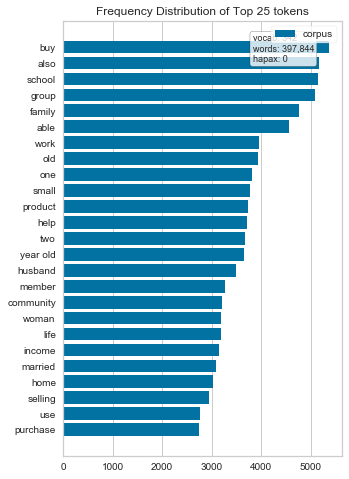

In [21]:
from yellowbrick.text import FreqDistVisualizer

plt.figure(figsize=(5,8))
visualizer = FreqDistVisualizer(features=tf_vectorizer.get_feature_names(), n=25)
visualizer.fit(dtm_tf)
visualizer.poof()

TSNEVisualizer(alpha=0.7,
        ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024021AE32E8>,
        classes=None, colormap=None, colors=None, decompose=None,
        decompose_by=None, labels=None, random_state=123)

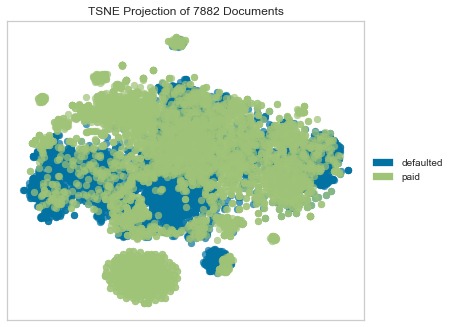

In [22]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(random_state=123)
tsne.fit(dtm_tf, kiva_df['status'])
tsne.poof()

# Vectorization

Using the cleaned Kiva data from above, we'll try a few different methods:

- BOW (with raw TF, and TF-IDF)
- Feature hashing
- Topics
- GloVe

## BOW - TF

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(min_df=.05, max_df=.5, ngram_range=[1,3])
%time dtm_tf = tf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df = pd.DataFrame(dtm_tf.toarray(), columns=tf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df.shape

kiva_df_bow = pd.concat([kiva_df, bow_df], axis=1)
kiva_df_bow.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow.shape
kiva_df_bow.head()
kiva_df_bow.tail()

Wall time: 3.98 s


(7882, 342)

(7882, 348)

,status,sector,country,gender,loan_amount,nonpayment,able,access,access business,access business training,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,defaulted,Agriculture,Kenya,M,500.0,lender,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,defaulted,Food,Kenya,F,500.0,lender,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,defaulted,Food,Kenya,M,500.0,lender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,defaulted,Services,Kenya,F,500.0,lender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,defaulted,Construction,Kenya,M,500.0,lender,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,status,sector,country,gender,loan_amount,nonpayment,able,access,access business,access business training,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
7983,paid,Clothing,Ecuador,F,1050.0,lender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7984,paid,Agriculture,Ecuador,F,2650.0,partner,2,0,0,0,...,0,0,0,0,0,0,0,0,4,0
7985,paid,Food,Ecuador,F,775.0,partner,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7986,paid,Retail,Ecuador,F,275.0,partner,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7987,paid,Services,Kenya,M,275.0,partner,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# BOW - TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.05, max_df=.5, ngram_range=[1,3])
%time dtm_tfidf = tfidf_vectorizer.fit_transform(kiva_df['en_clean'])

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=kiva_df.index)
bow_df_tfidf.shape

kiva_df_bow_tfidf = pd.concat([kiva_df, bow_df_tfidf], axis=1)
kiva_df_bow_tfidf.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_bow_tfidf.shape
kiva_df_bow_tfidf.head()

Wall time: 4.1 s


(7882, 342)

(7882, 348)

,status,sector,country,gender,loan_amount,nonpayment,able,access,access business,access business training,...,working,would,would like,wwwmifexorg,year ago,year experience,year old,year old married,yearold,young
0,defaulted,Agriculture,Kenya,M,500.0,lender,0.121480,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,defaulted,Food,Kenya,F,500.0,lender,0.000000,0.0,0.0,0.0,...,0.0,0.106737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,defaulted,Food,Kenya,M,500.0,lender,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,defaulted,Services,Kenya,F,500.0,lender,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,defaulted,Construction,Kenya,M,500.0,lender,0.105798,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Hashing

## Simple Example

In [65]:
from sklearn.feature_extraction.text import HashingVectorizer

docs = ["my dog loves your dog",
        "your dog loves the park",
        "my dog and your dog love fleas"]

h_vectorizer = HashingVectorizer(n_features=2**3, ngram_range=[1,1], norm=None, non_negative=True, alternate_sign=False)
dtm_h = h_vectorizer.fit_transform(docs)
dtm_h.toarray()
bow_df_h = pd.DataFrame(dtm_h.toarray())
bow_df_h.shape
bow_df_h.head()

C:\Users\st50\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\st50\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


array([[0., 0., 1., 0., 1., 2., 0., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 1., 2., 0., 1., 3., 0., 0.]])

(3, 8)

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0


## Kiva Example

In [25]:
from sklearn.feature_extraction.text import HashingVectorizer

h_vectorizer = HashingVectorizer(n_features=2**9, ngram_range=[1,3])
%time dtm_h = h_vectorizer.fit_transform(kiva_df['en_clean'])
bow_df_h = pd.DataFrame(dtm_h.toarray(), index=kiva_df.index)
bow_df_h.shape

kiva_df_h = pd.concat([kiva_df, bow_df_h], axis=1)
kiva_df_h.drop(columns=['en', 'en_clean'], inplace=True)
kiva_df_h.shape
kiva_df_h.head()

Wall time: 1.14 s


(7882, 512)

(7882, 518)

,status,sector,country,gender,loan_amount,nonpayment,0,1,2,3,...,502,503,504,505,506,507,508,509,510,511
0,defaulted,Agriculture,Kenya,M,500.0,lender,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,-0.063758,0.000000,-0.063758,0.127515,0.000000,-0.063758,0.000000
1,defaulted,Food,Kenya,F,500.0,lender,0.048853,0.048853,0.0,-0.048853,...,0.0,0.0,0.0,0.000000,-0.048853,0.000000,0.000000,-0.048853,-0.048853,0.000000
2,defaulted,Food,Kenya,M,500.0,lender,0.000000,-0.058926,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.058926,0.000000,0.000000,0.000000,0.000000
3,defaulted,Services,Kenya,F,500.0,lender,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,-0.075593,0.000000,0.000000,0.000000,0.000000,0.000000
4,defaulted,Construction,Kenya,M,500.0,lender,-0.067116,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.067116,0.000000,0.067116,0.067116,0.000000,0.000000,0.067116


# Embeddings with Doc2Vec

Inspirational blog posts:
- https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/
- https://markroxor.github.io/gensim/static/notebooks/doc2vec-lee.html

## Toy Model 1

In [26]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs = ["the dog is really smart",
        "the cat is really smart",
        "the rat is really smart",
        "the mouse is really smart",
        "the dog ran to the store",
        "the cat ran to the store",
        "the rat ran to the store",
        "the mouse rand to the store",
        "the dog is really dumb",
        "the cat is really dumb",
        "the dog is brown",
        "the cat is brown",
        "this document has nothing to do with any of the others"]

documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(docs)]

C:\Users\st50\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [27]:
%time model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4, epochs=10000, alpha=0.065, seed=123)
print(model)
for i in range(0, len(docs)):
    print(model.docvecs[i])

Wall time: 19.1 s
Doc2Vec(dm/m,d5,n5,w2,s0.001,t4)
[ 0.99248874  0.41061038  0.02131949  5.500582   -0.97168183]
[-3.7883854 -1.4582045  1.6334202  0.6515057 -3.2550743]
[-4.529103  -2.773157  -0.8444491  2.2315423 -1.759981 ]
[-2.1608121  -1.8652055  -1.9994868   5.028724   -0.39297175]
[0.9872789 3.5198617 2.4392228 1.7691325 4.3211737]
[-3.2556016  1.585831   3.8298566 -2.5451846  2.4321797]
[-4.310841   -0.42158404  1.0943148  -0.99977106  4.599478  ]
[ 0.5099778  -1.716412   -0.13483465  3.6288497   6.089962  ]
[-1.4100575  4.432139   0.5851983  4.7612267  1.3690388]
[-5.8778386   2.5158525   1.8297108   0.31852654 -0.58893776]
[ 2.2075603  3.1818073  3.8700628  2.948709  -1.1176034]
[-1.439374    1.5633134   4.854304   -0.47629768 -2.7713668 ]
[ 0.90785456 -5.2965612   4.4545765   2.5252194  -0.92053807]


In [28]:
for idx in range(0, len(docs)):
    print("\n\nDoc {}".format(idx))
    print(docs[idx])
    print(model.docvecs[idx])
    sim = model.docvecs.most_similar(idx, topn=5)
    print("\n")
    
    for i in range(0, 3):
        print("Closest doc {} {} ({})".format(i, sim[i][0], sim[i][1]))
        closest_idx = sim[i][0]
        print(docs[closest_idx])
        print(model.docvecs[closest_idx])



Doc 0
the dog is really smart
[ 0.99248874  0.41061038  0.02131949  5.500582   -0.97168183]


Closest doc 0 3 (0.7194470167160034)
the mouse is really smart
[-2.1608121  -1.8652055  -1.9994868   5.028724   -0.39297175]
Closest doc 1 8 (0.65193772315979)
the dog is really dumb
[-1.4100575  4.432139   0.5851983  4.7612267  1.3690388]
Closest doc 2 10 (0.5811523795127869)
the dog is brown
[ 2.2075603  3.1818073  3.8700628  2.948709  -1.1176034]


Doc 1
the cat is really smart
[-3.7883854 -1.4582045  1.6334202  0.6515057 -3.2550743]


Closest doc 0 2 (0.8083950877189636)
the rat is really smart
[-4.529103  -2.773157  -0.8444491  2.2315423 -1.759981 ]
Closest doc 1 9 (0.6459209322929382)
the cat is really dumb
[-5.8778386   2.5158525   1.8297108   0.31852654 -0.58893776]
Closest doc 2 11 (0.6013350486755371)
the cat is brown
[-1.439374    1.5633134   4.854304   -0.47629768 -2.7713668 ]


Doc 2
the rat is really smart
[-4.529103  -2.773157  -0.8444491  2.2315423 -1.759981 ]


Closest doc 0

## Toy Model 3 - Kiva

In [29]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs = kiva_df['en_clean']

documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(docs)]

In [30]:
%time model = Doc2Vec(documents, vector_size=8, window=2, min_count=5, workers=4, epochs=200, seed=123)
print(model)


Wall time: 2min 11s
Doc2Vec(dm/m,d8,n5,w2,mc5,s0.001,t4)


In [31]:
%%time

import collections

ranks = []
second_ranks = []
for doc_id in range(len(documents)):
    inferred_vector = model.infer_vector(documents[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])

Wall time: 2min 48s


In [32]:
collections.Counter(ranks).most_common(10) 
collections.Counter(ranks)[0]
collections.Counter(ranks)[1]
collections.Counter(ranks)[43]

[(0, 467),
 (1, 313),
 (2, 256),
 (3, 231),
 (4, 204),
 (5, 191),
 (6, 167),
 (7, 151),
 (8, 146),
 (9, 139)]

467

313

37

In [33]:
doc_id = 4554
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(documents[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(documents[sims[index][0]].words)))

Document (4554): «bolvar year experience manufacturing dresser storing clothes left native city came live near uncle isla trinitaira guayaquil started work learned profession slowly became independent two year ago married wife charge buying wood business located front place live dont pay rent caretaker place steady client order product every week charge advance balance upon delivery work monday saturday trying little little get ahead still paying used planing machine bought bolvar need loan buy another planing machine always employee working right need take turn permit production increase bolvar year old one child wife help business especially buying wood married two year since young trying get ahead family life well business aspiration establish business well save buy home translated spanish naomi johnson kiva volunteer»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d8,n5,w2,mc5,s0.001,t4):

MOST (6029, 0.9597870111465454): «deanis altagracia guzman wish build full scale beauty cent

In [34]:
doc_id = 543
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(documents[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(documents[sim_id[0]].words)))

Train Document (543): «mary year old married child active member st jude woman group located githunguri thika unit christian faith member presbyterian church east africa teacher local school also practice farming rear dairy cattle grows vegetable farm earns total usd per month teaching job farming plan make sure child get good education provide best mother give biggest challenge finance feel improve farming method better position usd loan would like buy organic manure soil supplement increase production farm willing make repayment monthly basis»

Similar Document (396, 0.9827365279197693): «mary gakenia maina year old single mother two child one child junior school second year old active member wendani self help group life ngorika settlement rift valley part kenya one acre piece land farm maize potato potato farming seasonal done four time year give competitive price planted right time given appropriate attention term water pest control requesting loan use follows lease two acre land b

In [35]:
idx = 0
sim = model.docvecs.most_similar(idx, topn=10)
sim

idx
docs.iloc[idx]
model.docvecs[idx]

for i in range(0, 3):
    print("Closest doc {} {} ({})".format(i, sim[i][0], sim[i][1]))
    closest_idx = sim[i][0]
    docs.iloc[closest_idx]
    model.docvecs[closest_idx]


[(1712, 0.9852263927459717),
 (1170, 0.9747959971427917),
 (432, 0.9694892168045044),
 (2923, 0.9689468741416931),
 (3576, 0.9681254029273987),
 (954, 0.9673334360122681),
 (4276, 0.9670917987823486),
 (4277, 0.9649144411087036),
 (3429, 0.9647232294082642),
 (814, 0.9634026885032654)]

0

'description written rowland amulyoto staff member village enterprise fund representing business robert married child addition family take care mother brother robert started planting vegetable selling local market diversified tea nursery profitable given loan robert able improve activity buying fertilizer pesticide pump seedling pump remove uncertainty weather current capital venture ksh allow robert maximize potential robert completed high school never got employment got apprentice training tea extension officer go getter main hobby teaching music'

array([ 1.1980051 ,  1.023994  , -3.0658832 , -1.3409452 ,  1.1148725 ,
       -2.077089  ,  0.19002658, -0.19003806], dtype=float32)

Closest doc 0 1712 (0.9852263927459717)


'teresia wanjiku born year ago town kiambu married four child first born working hotel nairobi two college fourth still primary school dedicated christian worship kanunga catholic church member catholic woman association cwa teresias obvious leadership skill made role model many young woman year since marriage husband run tailoring shop local shopping center working dairy farmer also raise pig earlier year friend told teresia many way woman economic empowerment consort kiva working boost business kiambu became interested project immediately joined woman group come u loan use boost tailoring business buying clothing material use make dress intends repay loan within month'

array([ 1.3800128 ,  1.0005883 , -3.229257  , -1.3149457 ,  1.5749676 ,
       -1.5221534 ,  0.13650416, -0.17150591], dtype=float32)

Closest doc 1 1170 (0.9747959971427917)


'susan born st march married one child lower primary school private primary school nairobi susan like colleague joined group registered weec hearing good news weec kiva boosted many business kiambu surroundings elected discipline mistress group susan sell secondhand clothes kawangware business last year raised educated child income earned secondhand clothes business given loan usd intends buy bale secondhand clothes willing repay loan within month'

array([ 1.9684074 ,  2.007368  , -5.332796  , -2.4643576 ,  1.7331749 ,
       -2.0837624 , -0.00788527, -0.99241424], dtype=float32)

Closest doc 2 432 (0.9694892168045044)


'jane married five child child attend public primary school isinya kenya active member also treasurer nanapae woman group also treasurer merry go round area emily joined group registered weec year jane started bead work business four year ago initial capital amount usd loaned weec make beautiful belt mat dress shoe earring conduct business open air market isinya stock increased usd usd jane seeking loan usd add additional stock business'

array([ 1.9800103 ,  2.120033  , -4.589822  , -1.7324752 ,  1.300927  ,
       -1.6647959 ,  0.33758453, -0.24634889], dtype=float32)

In [36]:
docs.iloc[25]

'saami year old married child religiuou together wither family saami primary education class married completing primary level education due cultural limitationssaami treasurer kiret naboisho w g attended various leadership training session organized weec training assist woman running group activity saami steer however died drought period death almost whole stock affected family income generating activity saami plan build stock intends buy steer usd sell steer month reinvest proceeds steer business saami intends attend livestock management course scheduled december saami feel important train modern method managing livestock also listed train basic business management skill'